# This notebook generates test instances of the mincut problem and converts it to the respective Ising Hamiltonians


In [108]:
import networkx as nx
import matplotlib.pylab as plt

import maxcutpy
import maxcutpy.graphdraw as gd
import maxcutpy.maxcut as mc
import maxcutpy.graphcut as gc
import maxcutpy.graphtest as gt

In [272]:
seed = 123

# most used graphs
G1 = nx.erdos_renyi_graph(n=24, p=0.3, seed=seed)

# some cool graphs
G2 = nx.star_graph(4)
G3 = nx.path_graph(4)
G4 = nx.petersen_graph()
G5 = nx.dodecahedral_graph()
G6 = nx.house_graph()
G7 = nx.moebius_kantor_graph()
G8 = nx.barabasi_albert_graph(5, 4)
G9 = nx.heawood_graph()
G10 = nx.icosahedral_graph()
G11 = nx.sedgewick_maze_graph()
G12 = nx.havel_hakimi_graph([1, 1])
G13 = nx.complete_graph(20)
G14 = nx.bull_graph()

G = G2  # choose a graph from the list

Automatic pdb calling has been turned ON


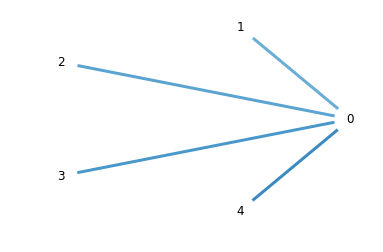

Time 'local_consistent_max_cut':0.0
Edges cut: 4


Time 'lazy_local_consistent_max_cut':0.0
Edges cut: 4




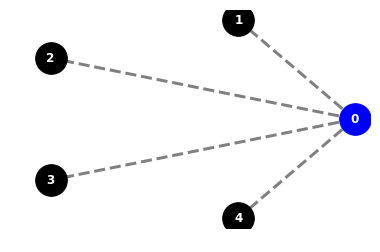

In [273]:
%pdb
gd.draw_custom(G)
plt.show()

#exact cut
print("Time 'local_consistent_max_cut':" + str(gt.execution_time(mc.local_consistent_max_cut, 1, G)))
print('Edges cut: ' + str(gc.cut_edges(G)))
print('\n')
print("Time 'lazy_local_consistent_max_cut':" + str(gt.execution_time(mc.lazy_local_consistent_max_cut, 1, G)))
print('Edges cut: ' + str(gc.cut_edges(G)))
print('\n')

gd.draw_cut_graph(G)
plt.show()

Time 'trevisan_approximation_alg': 0.003
Edges cut: 4


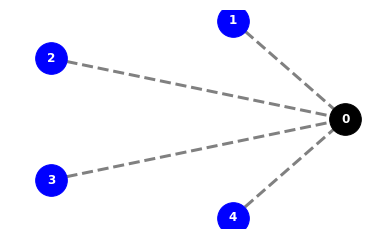



Edges cut: 4


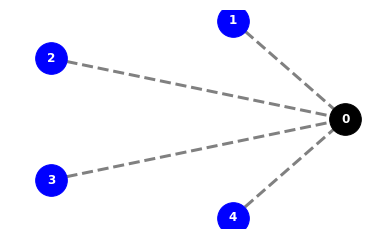

In [274]:
#approximated cut
print("Time 'trevisan_approximation_alg': " + str(gt.execution_time(mc.trevisan_approximation_alg, 1, G)))
print('Edges cut: ' + str(gc.cut_edges(G)))

gd.draw_cut_graph(G)
plt.show()

print('\n')
#print('Time Greedy: ' + str(gt.execution_time(mc.greedy_cut, 1, G)))
print('Edges cut: ' + str(gc.cut_edges(G)))

gd.draw_cut_graph(G)
plt.show()

In [275]:
mc.local_consistent_max_cut(G)

({0: 1, 1: -1, 2: -1, 3: -1, 4: -1}, 4)

In [276]:
colorings, cut_edges = mc.local_consistent_max_cut(G)

In [294]:
import numpy as np
def make_maxcut_hamiltonian(g, A, B):
    """
    Returns a Hamiltonian for the maxcut problem as described in 
    "Ising formulations of many NP problems" by Andrew Lucas

    Parameters
    ----------
    G: nx.Graph 
       input graph
    A: float
       constant to enforce equality of partitions
    B: float
       constant to enforce minimum/maximum of cut edges
    For correctness A/B > min(2*d, N)/8, where d is a maximal degree in G, N is a number of nodes
    """
    n = g.number_of_nodes()
    h = A * np.ones((n, n)) + B / 2 * np.ones((n, n))
    for u, v in g.edges:
        h[u][v] = h[u][v] - B / 4 
        h[v][u] = h[v][u] - B / 4
    return h

In [305]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)
n_nodes = G.number_of_nodes()
A = min(2*dmax, n_nodes)/8-0.1
B = -1
print('A: {}\nB: {}'.format(A, B))

h = make_maxcut_hamiltonian(G, A, B)
#h = make_maxcut_hamiltonian(G, 0, -1)

A: 0.525
B: -1


In [306]:
spin_vector = np.array([colorings[key] for key in sorted(colorings.keys())])
s = spin_vector[np.newaxis, :]

In [307]:
print(s)
s2 = s.copy()
s2[0][3] = 1
print(s2)

[[ 1 -1 -1 -1 -1]]
[[ 1 -1 -1  1 -1]]


In [308]:
print(s @ h @ s.T)

[[-1.775]]


In [309]:
print(s2 @ h @ s2.T)

[[-0.975]]


In [310]:
print(h)

[[0.025 0.275 0.275 0.275 0.275]
 [0.275 0.025 0.025 0.025 0.025]
 [0.275 0.025 0.025 0.025 0.025]
 [0.275 0.025 0.025 0.025 0.025]
 [0.275 0.025 0.025 0.025 0.025]]
